<a href="https://colab.research.google.com/github/CaioBrant/Machine-Learning-Caio/blob/main/Assignment_4_(empty).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Turing Machine and Deep Learning 2023

## Assignment 4 -- Neural Networks

This notebook is meant for you to review and reflect on the content of Lecture 4, which was mainly about neural networks. In particular, we'll focus on aspects that were only briefly mentioned in class in order for you to get a better understanding of it. 

### Handing in your Assignment

Git is an invaluable resource to researchers and developers, and thus for this course, all course material will be (additionally) shared on GitHub. Though there is a tiny bit of a learning curve, this is worth the effort. To hand in your assignment (applicable to all weeks):

1. Create a folder called "Week 4" and copy this notebook and any other files or data that may be needed.
2. Finish the notebook and commit and push regularly. Your final commit before the deadline will be graded. 


### Grading

Each one of the (sub-)questions below will be graded either 0 (insufficient), 1 (sufficient) or 2 (good). If $N$ is the number of sub-questions, and $p_i$ is your score for sub-question $i$, your total grade $G$ for this assignment is:
$$G=\frac{1}{2 N}\sum_{i=0}^{N}p_i$$

In [1]:
# load common libraries
import numpy as np                 # maths
import matplotlib.pyplot as plt    # plotting
import pandas as pd                # data manipulation
from tqdm import tqdm              # loading bar
from time import perf_counter      # timer
import tensorflow as tf            # NNs and associated
from tensorflow import keras       # NNs and associated

# Q1 CNNs

In the lecture, we saw some code that implemented MLPs and CNNs for the task of image classification on CIFAR10. However, we skipped over some details of what CNNs actually do.

A CNN works by automatically learning and extracting meaningful patterns, features, and hierarchies from the input data in the following way:

1. **Convolution**: A CNN applies (multiple) small filters (kernels) to an input image, performing element-wise multiplications and sums to extract features like edges, corners, and textures. We also did this computation in person during class. These kernels may be a matrix (what we saw in the lecture), or even a stack of matrices (e.g. for RGB images). I'd recommend watching this [3Blue1Brown video](https://www.youtube.com/watch?v=KuXjwB4LzSA&pp=ygUTY29udm9sdXRpb25zIGluIGNubg%3D%3D) and this [DeepLearning.AI](https://www.youtube.com/watch?v=KTB_OFoAQcc) video for reference.
2. **Non-linearity**: Non-linear activation functions (e.g., ReLU) are applied to introduce complexity and allows the capture of more abstract representations.
3. **Pooling**: Pooling operations are used to downsample the spatial dimensions of feature maps while preserving the most important information. In both cases, a pooling window or filter moves across the input feature map, and a single value is selected or computed within the window based on the pooling operation. Pooling helps reduce the computational complexity of the network and introduces some translation invariance. There are a few types of pooling, but most commonly used are max-pooling and average-pooling.
4. **Hierarchy**: Convolution and pooling operations are repeated to create a hierarchy of feature extraction layers, learning more complex and high-level features.
5. **Fully Connected Layers**: Flattened features are passed through fully connected layers, similar to a traditional MLP, for classification or regression.
6. **Training**: Parameters are adjusted using backpropagation and optimization algorithms to minimize the difference between predictions and true labels.

By leveraging convolution, non-linearity, and hierarchical feature extraction, CNNs can automatically learn and recognize intricate patterns and structures in visual data, making them well-suited for tasks like image classification and object detection.

You can think of the convolution operation with a kernel over an image as outputting a new modified image, called a feature map. When applying convolutions over feature maps, the size of the output feature map (in each dimension) can be computed by:

$$o = \frac{i - k + 2 p}{s}+1$$

where the hyperparameters of the convolution are:
- $i$: input_size is the size (height or width) of the input feature map.
- $k$: kernel_size is the size (height or width) of the convolutional kernel/filter.
- $p$: padding is the number of pixels added to each side of the input feature map (if applicable) (default 0)
- $s$: stride is the step size or the number of pixels the kernel moves at each step (default 1)

The output size of a pooling operation can also be defined as:
$$o = \frac{i - p}{s}+1$$

For both of these above computations, the outputs (if they are floating points) are *floored*, i.e. rounded down to the nearest positive integer (since you cannot have a non-negative number of pixels).

**Q1.1** Thus, starting with a 28x28 pixel image (e.g. MNIST), write a series of kernel sizes to use in convolutions (optionally including a pooling operation if you want to try it out, and optionally padding and stride) in order to get it down to an image size of 6x6. There are several correct answers possible here.

**No padding:** For each dimension: using the first formula above, we get 6 = 28 - k + 1 (p=0 and s=1) -> k = 22
Kernal size: 23x23

**With padding:** 6 = 28 - k + 2 + 1 -> k = 20
Kernal size: 21x21

**Larger stride:** 6 = ((28 - k)/2) + 1 -> 
Kernal size: 18x18

**Q1.2** Now, let's try out your strategy in code. Implement the convolutions you defined above to perform classification over MNIST digits. Note that most of the code is written for you, but be mindful of the steps that are written. Note that you need to choose the number of kernals as well as the size at each layer. The input shape of your next layer is the output shape you computed above and the number of kernels you chose for the previous layer ``input_shape=(w,h,k)``.

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Convert the labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
# TODO: Complete this cell

# A Conv2D layer performs 2D convolution -- the same as we saw in class.
# The main inputs to this class are the number of kernels, the size of each kernel,
# the non-linear activation function and the input shape. Optionally, you can define a padding
# and/or a stride. Use it like this:
# keras.layers.Conv2D(<n_kernels>, 
#                     kernel_size=<tuple>, 
#                     activation=<string>, 
#                     input_shape=<tuple>, 
#                     padding=<string>, 
#                     stride=<int/tuple>)
# You can read the documentation here: https://keras.io/api/layers/convolution_layers/convolution2d/

# Build the model
model = keras.Sequential([
    keras.layers.Conv2D(2, kernel_size= (23, 23), activation='relu', input_shape=(28, 28, 1)), # i'll give you the first shape for free
    keras.layers.Flatten(),                            # flatten to dense layer for classification
    keras.layers.Dense(64, activation='relu'),           # add dense layer (add more if you want) 
    keras.layers.Dense(10, activation='softmax')      # final dense layer (how many categories are there?). 
                                                       # softmax for probability distribution output
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model: choose batch size and number of epochs
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.2)

# Evaluate the model. I made a mistake here, it is in the code below
#test_loss, test_acc = model.evaluate(x_test, y_test)
#print('Test accuracy:', test_acc)

Epoch 1/10
750/750 [==============================] - 18s 22ms/step - loss: 0.6175 - accuracy: 0.8043 - val_loss: 0.3628 - val_accuracy: 0.8915
Epoch 2/10
750/750 [==============================] - 17s 23ms/step - loss: 0.3500 - accuracy: 0.8954 - val_loss: 0.2864 - val_accuracy: 0.9120
Epoch 3/10
750/750 [==============================] - 16s 21ms/step - loss: 0.2983 - accuracy: 0.9097 - val_loss: 0.2620 - val_accuracy: 0.9218
Epoch 4/10
750/750 [==============================] - 16s 21ms/step - loss: 0.2694 - accuracy: 0.9177 - val_loss: 0.2324 - val_accuracy: 0.9293
Epoch 5/10
750/750 [==============================] - 16s 22ms/step - loss: 0.2473 - accuracy: 0.9249 - val_loss: 0.2201 - val_accuracy: 0.9339
Epoch 6/10
750/750 [==============================] - 17s 23ms/step - loss: 0.2330 - accuracy: 0.9303 - val_loss: 0.2164 - val_accuracy: 0.9339
Epoch 7/10
750/750 [==============================] - 17s 23ms/step - loss: 0.2187 - accuracy: 0.9338 - val_loss: 0.2132 - val_accuracy:

In [7]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.1823 - accuracy: 0.9453
Test accuracy: 0.9452999830245972


**Q1.3** Plot the train and validation losses and and accuracies. Do not forget to add labels What can you say about the model over/underfitting? Would you continue training it, or stop earlier? Why? 

**Your text answer**

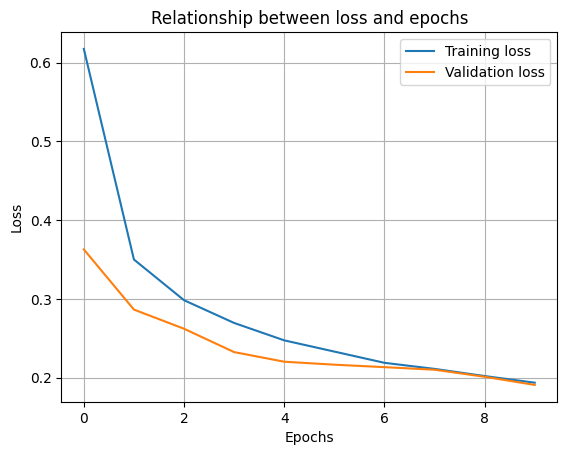

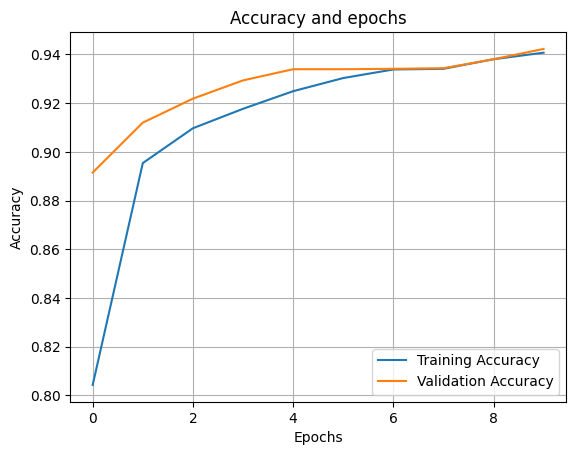

In [8]:
# plot losses
plt.plot(history.history["loss"], label="Training loss") # plot loss
plt.plot(history.history["val_loss"], label="Validation loss") # plot val_loss
plt.ylabel("Loss")
plt.xlabel("Epochs") # x-axis=epochs
plt.grid()
plt.legend()
plt.title("Relationship between loss and epochs")
plt.show()

# plot accuracies
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.grid(True)
plt.legend()
plt.title("Accuracy and epochs")
plt.show()

The model is likely to be underfitting before 6 epochs, since validation loss and accuracy were better than training, which was very unexpected.
At 8 epochs, there seems to be no under/over fitting, as traning loss and validation are very similar to validation. I would continue training, as the accurary is still increasing and the loss still decreasing.

# Q2 RNNs

An RNN (Recurrent Neural Network) is a type of artificial neural network that is particularly effective in processing sequential data. Unlike feedforward neural networks, which process inputs independently, RNNs have connections that allow information to flow in cycles. This cyclic connectivity enables them to capture temporal dependencies and learn patterns over time. You can find more in these [neural network lecture notes (Jaeger 2023, chapter 4)](https://www.ai.rug.nl/minds/uploads/LN_NN_RUG.pdf). Here is an overview of how RNNs work:

- **Recurrent Connections**: RNNs have recurrent connections that allow information to be passed from one step to the next in a sequence. At each time step, the RNN takes an input and combines it with the information from the previous step. This feedback loop enables the network to have memory and make predictions based on the context of past inputs.

- **Hidden State**: RNNs maintain a hidden state vector that serves as a memory of the network. The hidden state is updated at each time step and contains information about the previous inputs in the sequence. It captures the network's understanding of the sequence up to that point and is used to influence the processing of future inputs.

- **Sequence Processing**: RNNs process sequences by iterating through each element one at a time. As the network receives an input at each time step, it updates its hidden state based on the input and the previous hidden state. The updated hidden state is then used to make predictions or generate outputs.

- **Long Short-Term Memory (LSTM) and Gated Recurrent Units (GRU)**: LSTMs and GRUs are popular types of RNN architectures that address the vanishing gradient problem and capture long-term dependencies more effectively. These architectures introduce specialized memory cells and gating mechanisms that allow the network to selectively update and forget information.

- **Training**: RNNs are typically trained using the backpropagation through time (BPTT) algorithm, which extends backpropagation to handle sequences. The goal is to minimize the difference between the predicted outputs and the true targets by adjusting the network's parameters through gradient descent optimization.

- **Applications**: RNNs are well-suited for tasks involving sequential data, such as natural language processing, speech recognition, machine translation, time series analysis, and sentiment analysis. They can effectively model dependencies and capture context in these domains.

By leveraging recurrent connections and hidden state information, RNNs excel at processing and understanding sequential data. They are powerful tools for tasks that require temporal modeling and have made significant contributions to the field of deep learning.

Here, we'll use LSTMs to regress on the [Air Passengers](https://www.kaggle.com/datasets/chirag19/air-passengers) dataset, providing monthly totals of a US airline passengers from 1949 to 1960.

In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Load the Air Passengers dataset
data = pd.read_csv('AirPassengers.csv')
time_series = data['#Passengers'].values.astype(float)

# preprocess, use a scaler to scale the features to 0 and 1
time_series = np.array(time_series).reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0, 1))
time_series = scaler.fit_transform(time_series)

# Split the data into training and testing sets
train_data = time_series[:120]  # First 120 months for training
test_data = time_series[120:]   # Last 24 months for testing

# Function to create input sequences
# Goal: Predict the (n+1)th point given n points
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Define sequence length and create input sequences
sequence_length = 6
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Reshape the input data to be 3D (batch_size, sequence_length, num_features)
# Standard practice!
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

**Q2.1** Finish the following cell

In [22]:
# Build the LSTM model
model = keras.Sequential([
    keras.layers.LSTM(units=25, input_shape=(sequence_length, 1)),
    keras.layers.Dense(1) # how many outputs in this regression task? 
])

# Compile and train the model
model.compile(loss='mean_squared_error', optimizer='adam') # use MSE loss and Adam optimizer. If you don't know how, look it up!
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 3s 267ms/step - loss: 0.0752 - val_loss: 0.2857
Epoch 2/100
3/3 [==============================] - 0s 21ms/step - loss: 0.0589 - val_loss: 0.2342
Epoch 3/100
3/3 [==============================] - 0s 22ms/step - loss: 0.0455 - val_loss: 0.1886
Epoch 4/100
3/3 [==============================] - 0s 21ms/step - loss: 0.0340 - val_loss: 0.1492
Epoch 5/100
3/3 [==============================] - 0s 20ms/step - loss: 0.0252 - val_loss: 0.1158
Epoch 6/100
3/3 [==============================] - 0s 21ms/step - loss: 0.0181 - val_loss: 0.0885
Epoch 7/100
3/3 [==============================] - 0s 30ms/step - loss: 0.0139 - val_loss: 0.0666
Epoch 8/100
3/3 [==============================] - 0s 22ms/step - loss: 0.0107 - val_loss: 0.0505
Epoch 9/100
3/3 [==============================] - 0s 21ms/step - loss: 0.0094 - val_loss: 0.0391
Epoch 10/100
3/3 [==============================] - 0s 21ms/step - loss: 0.0092 - val_loss: 0.0320
Epoch 11/100
3/3 [

**Q2.2** Plot the train and validation losses and and accuracies. Do not forget to add labels What can you say about the model over/underfitting? Would you continue training it, or stop earlier? Why? 

**Your text answer**

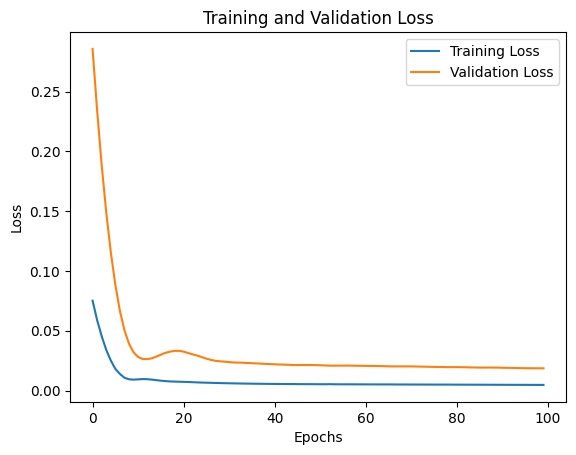

In [23]:


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#no accuracy


I would perhaps stop at around 25 epochs, since the loss spots improving from there onwards.
Before 15 epochs, there is significant underfitting.

Now, we can make predictions on our test set and evaluate it!

**Q2.3** Finish the following cell

1/1 [==============================] - 0s 36ms/step


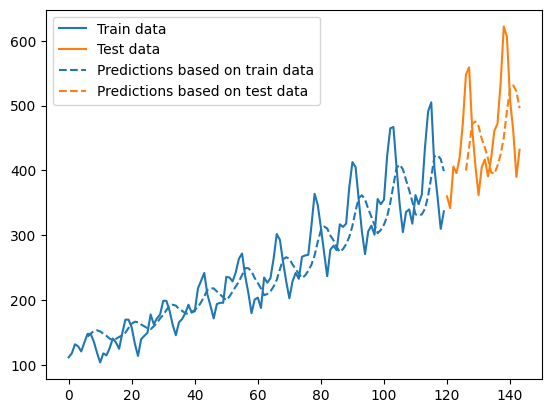

Train Score: 2014.54 (MSE)
Test Score: 8147.49 (MSE)


In [24]:
# Predict on the test set
# make predictions
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# invert predictions to make it original scale
train_preds = scaler.inverse_transform(train_preds)
y_train = scaler.inverse_transform(y_train)
test_preds = scaler.inverse_transform(test_preds)
y_test = scaler.inverse_transform(y_test)

# plotting code adapted from https://www.kaggle.com/code/singhalamogh/lstm-regression-on-time-series-data
# shift train predictions for plotting
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[sequence_length:len(train_preds) + sequence_length, :] = train_preds

# shift test true data for plotting
testTruePlot = np.empty_like(data)
testTruePlot[:, :] = np.nan
testTruePlot[len(train_preds)+sequence_length:len(data), :] = scaler.inverse_transform(test_data)

# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_preds)+2*sequence_length:len(data), :] = test_preds

# plot baseline and predictions
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.plot(scaler.inverse_transform(train_data), color=colors[0], label="Train data")
plt.plot(testTruePlot[:,0], color=colors[1], label="Test data")
plt.plot(trainPredictPlot[:,0], color=colors[0], linestyle="--", label="Predictions based on train data")
plt.plot(testPredictPlot[:,0], color=colors[1], linestyle="--", label="Predictions based on test data")
plt.legend()
plt.show()

# calculate root mean squared error
train_score = mean_squared_error(y_train, train_preds)
print('Train Score: %.2f (MSE)' % (train_score))
test_score = mean_squared_error(y_test, test_preds)
print('Test Score: %.2f (MSE)' % (test_score))

**Q2.4** Does the model do well? Write three ideas on how you would make it better. Implement at least one of these ideas and rerun your code, and report your results.

The model does well in capturing the variation but seems to predict lower variations than what actually happens. Based on the lecture, I added regularization and a dropout.

Epoch 1/100
3/3 [==============================] - 7s 492ms/step - loss: 0.0526 - val_loss: 0.1717
Epoch 2/100
3/3 [==============================] - 0s 42ms/step - loss: 0.0297 - val_loss: 0.1008
Epoch 3/100
3/3 [==============================] - 0s 31ms/step - loss: 0.0136 - val_loss: 0.0466
Epoch 4/100
3/3 [==============================] - 0s 40ms/step - loss: 0.0109 - val_loss: 0.0216
Epoch 5/100
3/3 [==============================] - 0s 32ms/step - loss: 0.0122 - val_loss: 0.0194
Epoch 6/100
3/3 [==============================] - 0s 39ms/step - loss: 0.0134 - val_loss: 0.0218
Epoch 7/100
3/3 [==============================] - 0s 43ms/step - loss: 0.0096 - val_loss: 0.0305
Epoch 8/100
3/3 [==============================] - 0s 32ms/step - loss: 0.0079 - val_loss: 0.0410
Epoch 9/100
3/3 [==============================] - 0s 44ms/step - loss: 0.0087 - val_loss: 0.0456
Epoch 10/100
3/3 [==============================] - 0s 34ms/step - loss: 0.0084 - val_loss: 0.0422
Epoch 11/100
3/3 [

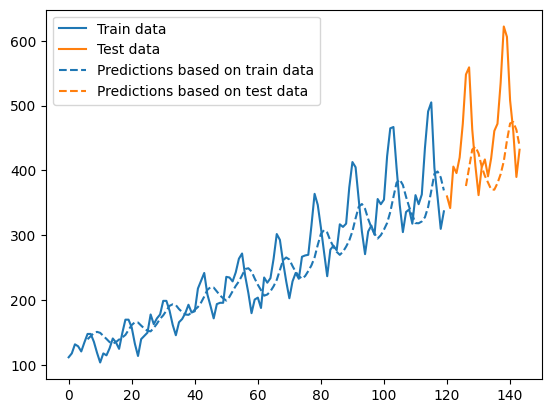

Train Score: 2058.72 (MSE)
Test Score: 9694.03 (MSE)


In [26]:
data = pd.read_csv('AirPassengers.csv')
time_series = data['#Passengers'].values.astype(float)

# preprocess, use a scaler to scale the features to 0 and 1
time_series = np.array(time_series).reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0, 1))
time_series = scaler.fit_transform(time_series)

# Split the data into training and testing sets
train_data = time_series[:120]  # First 120 months for training
test_data = time_series[120:]   # Last 24 months for testing

# Define sequence length and create input sequences
sequence_length = 6
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Reshape the input data to be 3D (batch_size, sequence_length, num_features)
# Standard practice!
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


# Build the LSTM model
model = keras.Sequential([
    keras.layers.LSTM(units=50, input_shape=(sequence_length, 1), return_sequences=True),
    keras.layers.Dropout(0.2),  # Add dropout for regularization
    keras.layers.LSTM(units=50),
    keras.layers.Dropout(0.2),  # Add dropout for regularization
    keras.layers.Dense(1)  # 1 output unit for regression task
])

# Compile and train the model
model.compile(loss='mean_squared_error', optimizer='adam')  # use MSE loss and Adam optimizer
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Predict on the test set
# make predictions
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# invert predictions to make it original scale
train_preds = scaler.inverse_transform(train_preds)
y_train = scaler.inverse_transform(y_train)
test_preds = scaler.inverse_transform(test_preds)
y_test = scaler.inverse_transform(y_test)

# plotting code adapted from https://www.kaggle.com/code/singhalamogh/lstm-regression-on-time-series-data
# shift train predictions for plotting
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[sequence_length:len(train_preds) + sequence_length, :] = train_preds

# shift test true data for plotting
testTruePlot = np.empty_like(data)
testTruePlot[:, :] = np.nan
testTruePlot[len(train_preds)+sequence_length:len(data), :] = scaler.inverse_transform(test_data)

# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_preds)+2*sequence_length:len(data), :] = test_preds

# plot baseline and predictions
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.plot(scaler.inverse_transform(train_data), color=colors[0], label="Train data")
plt.plot(testTruePlot[:,0], color=colors[1], label="Test data")
plt.plot(trainPredictPlot[:,0], color=colors[0], linestyle="--", label="Predictions based on train data")
plt.plot(testPredictPlot[:,0], color=colors[1], linestyle="--", label="Predictions based on test data")
plt.legend()
plt.show()

# calculate root mean squared error
train_score = mean_squared_error(y_train, train_preds)
print('Train Score: %.2f (MSE)' % (train_score))
test_score = mean_squared_error(y_test, test_preds)
print('Test Score: %.2f (MSE)' % (test_score))

# Q3 Full pipeline

In lieu of this being the final assignment, I would like to drill down last week's final question as being the final question of the course assignments. 

Now that you know about neural networks and regularization (early stopping, dropout, etc), try and predict the genre of the movie based on the overview. 
- This week, you may use the overview, as well as any other data from the dataframe that you'd like, processed how you'd like. Note that the inputs to your model **must not** contain the genres themselves. 
- Copy your assignment notebook and data set from last week into the current folder (Week 4 -- **do not** edit the file in folder Week 3).
- Focus on the final question (please let me/the TA's know if you need help with previous questions from last week). 
- Attempt to maximize your test score and don't forget to time the model training and inference (look at Assignment 2 for reference on how to do this). 
- Use whatever kind of UML and SML methods you'd like, including the networks you learned about this week (I'd suggest MLPs or RNNs). 
- Fill in the 150 word paragraph at the very end of the file.
- Finally, when you're done, submit to the competition with your final result. You can submit multiple times before the next lecture. We'll discuss methods and results during the final lecture to see how you and your peers have done.

This question will be graded pass or fail depending on if you've made an honest attempt at it.

In [27]:
df = pd.read_csv('tmdb_5000_movies.csv')
df = df[['title', 'overview', 'genres']]
df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     4803 non-null   object
 1   overview  4800 non-null   object
 2   genres    4803 non-null   object
dtypes: object(3)
memory usage: 112.7+ KB
                                      title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  \
0  In the 22nd century, a paraplegic Marine is di...   
1  Captain Barbossa, long believed to be dead, ha...   
2  A cryptic message from Bond’s past sends him o...   
3  Following the death of District Attorney Harve...   
4  John Carter is a war-weary, former military ca...   

                                          

In [28]:
df = df.dropna().reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     4800 non-null   object
 1   overview  4800 non-null   object
 2   genres    4800 non-null   object
dtypes: object(3)
memory usage: 112.6+ KB


In [29]:
#One hot enconde genres
np.random.seed(0)

def process_genre_string(gs):
    """ Processes genres into a single item from a list"""
    gs = eval(gs)
    gs = [x['name'] for x in gs]
    genre = "Unknown"
    if gs:
        genre = np.random.choice(gs) # choose random entry
    return genre

# TODO: Fill in
def encode_labels(label, unique_labels):
    out = np.zeros(len(unique_labels))
    out[unique_labels.index(label)] = 1
    return out

# save genres
processed_genres = []
for index, row in df.iterrows():
    processed_genres.append(process_genre_string(row['genres']))



unique_genres = sorted(list(set(processed_genres)))

# add to dataframe as new column
df["proc_genres"] = processed_genres

# one-hot encode genres
enocded_labels = []
for index, row in tqdm(df.iterrows(), total=len(df)):
    enocded_labels.append(encode_labels(row['proc_genres'], unique_genres))

df["one_hot_genres"] = enocded_labels
print(df)

100%|██████████| 4800/4800 [00:00<00:00, 8453.03it/s]

                                         title  \
0                                       Avatar   
1     Pirates of the Caribbean: At World's End   
2                                      Spectre   
3                        The Dark Knight Rises   
4                                  John Carter   
...                                        ...   
4795                               El Mariachi   
4796                                 Newlyweds   
4797                 Signed, Sealed, Delivered   
4798                          Shanghai Calling   
4799                         My Date with Drew   

                                               overview  \
0     In the 22nd century, a paraplegic Marine is di...   
1     Captain Barbossa, long believed to be dead, ha...   
2     A cryptic message from Bond’s past sends him o...   
3     Following the death of District Attorney Harve...   
4     John Carter is a war-weary, former military ca...   
...                                          

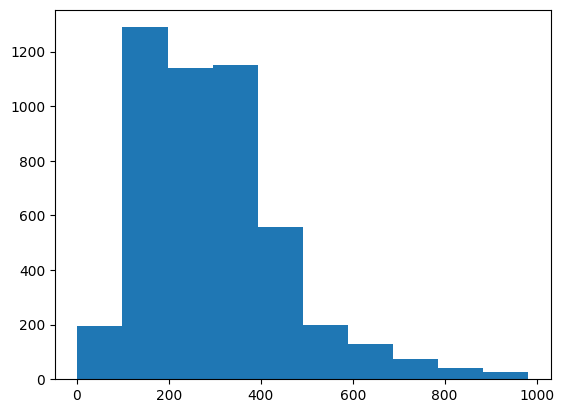

In [32]:
# PROCESS OVERVIEWS
import re
def remove_punctuation(text):
    """ Only retains letters, numbers, underscores and whitespace """
    pattern = r'[^\w\s]'
    return re.sub(pattern, '', text)

processed_overviews = []

# loop over df, remove punctuation, make words lowercase and add it to a new column

for index, row in df.iterrows():
    processed_overviews.append(remove_punctuation(row['overview']))

df["proc_overview"] = processed_overviews

# get the word lengths of each overview and store it in a list 
overview_lens = []
for index, row in df.iterrows():
    overview_lens.append(len(row['proc_overview']))

# for the sake of simplicity, add these values as a column to the df
df["overview_len"] = overview_lens
plt.hist(overview_lens)
plt.show()

In [33]:
token_len = 15 # number of words
# only select rows where overview len is more than or equal to token_len
df = df = df[df['overview_len'] >= token_len]

# split each proc_overview into a list of words, select the first token_len words, 
# and add the list of words back into df["proc_overview"]
df['proc_overview'] = df['proc_overview'].str.split().apply(lambda x: x[:token_len])

# print to verify
df

,title,overview,genres,proc_genres,one_hot_genres,proc_overview,overview_len
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[In, the, 22nd, century, a, paraplegic, Marine...",172
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",Fantasy,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[Captain, Barbossa, long, believed, to, be, de...",172
2,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[A, cryptic, message, from, Bonds, past, sends...",236
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[Following, the, death, of, District, Attorney...",419
4,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Adventure,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[John, Carter, is, a, warweary, former, milita...",333
...,...,...,...,...,...,...,...
4795,El Mariachi,El Mariachi just wants to play his guitar and ...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Crime,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[El, Mariachi, just, wants, to, play, his, gui...",329
4796,Newlyweds,A newlywed couple's honeymoon is upended by th...,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",Comedy,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[A, newlywed, couples, honeymoon, is, upended,...",83
4797,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",TV Movie,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[Signed, Sealed, Delivered, introduces, a, ded...",461
4798,Shanghai Calling,When ambitious New York attorney Sam is sent t...,[],Unknown,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[When, ambitious, New, York, attorney, Sam, is...",398


In [34]:
df["proc_overview"][0]

['In',
 'the',
 '22nd',
 'century',
 'a',
 'paraplegic',
 'Marine',
 'is',
 'dispatched',
 'to',
 'the',
 'moon',
 'Pandora',
 'on',
 'a']

In [35]:
wordlist = []

for row in df['proc_overview']:
    words = row
    wordlist.extend(words)

unique_words = sorted(list(set(wordlist)))

vocab_len = len(unique_words)
print(vocab_len)

13917


In [36]:
#encoding
encoded_labels = []


for index, row in tqdm(df.iterrows(), total=len(df)):
    sentence_encode = np.zeros(len(unique_words))  # Initialize the encoding for this overview

    for word in row["proc_overview"]:
        word_encode = encode_labels(word, unique_words)  # Get the encoding for this word
        sentence_encode += word_encode  # Add the encoding to the sentence encoding

    encoded_labels.append(sentence_encode)

df["one_hot_overview"] = encoded_labels
df['one_hot_overview'] # print to verify
print(len(df["one_hot_overview"][0]))

100%|██████████| 4799/4799 [00:34<00:00, 138.71it/s]


13917


In [39]:
#PCA
from sklearn.decomposition import PCA
#1355 components needed to explain 80% of the variance
x_train = np.array(df['one_hot_overview'])
print(x_train.shape)
x_train_reshaped = [vector.reshape(-1,) for vector in x_train]
pca = PCA(n_components=1355)  
x_train_pca = pca.fit(x_train_reshaped)
x_train_pca = pca.fit_transform(x_train_reshaped)

#plt.figure(figsize=(8, 6))
#plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], cmap='tab10', alpha=0.6, s=1)
#plt.colorbar()
#plt.title('One hot overview')
#plt.xlabel('Principal Component 1')
#plt.ylabel('Principal Component 2')
#plt.show()

explained_variance_ratio = pca.explained_variance_ratio_
variance_lost = 1 - sum(explained_variance_ratio)
print("Variance Lost: {:.2%}".format(variance_lost))

(4799,)
Variance Lost: 20.37%


In [40]:
labels_pca = pca.fit_transform(df['one_hot_overview'].values.tolist())
df["overview_pca"] = labels_pca.tolist()
print(df["overview_pca"][0])

[0.12527627702617591, 1.313067268825304, 1.3210249780002437, 0.8991166078584472, 0.6967619437484895, -0.614372875246752, 0.15983339018431136, 0.24983392411479138, 0.13019507444569423, -0.297845164183284, 0.0493719508286765, 0.2781877320154287, 0.6739940709201042, -0.146581996487167, 0.0169675753559538, 0.18790165696523425, -0.10538181000671319, -0.1319161247204724, -0.26457404986871896, 0.5793631087134381, -0.15784789051331466, 0.02233688667766325, -0.2386122327748359, -0.19644193290527645, -0.19220384374822824, 0.13235412184048062, -0.3265317874690041, -0.15556906903937157, 0.1203582770208403, 0.017258135679155864, 0.10445141652077264, 0.1184239123073423, -0.13893364570425595, 0.005375798689746718, 0.027001173261306927, -0.08000436902666476, -0.07367583122900391, 0.043043843431385904, 0.05660186476607125, -0.014591720118331961, 0.017224828922323725, 0.04225394311789252, -0.07035087608590941, -0.033315081196380186, 0.03875458353454567, -0.014286909535143345, 0.03528663471752967, 0.0285

In [41]:
print(df.head())

                                      title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  \
0  In the 22nd century, a paraplegic Marine is di...   
1  Captain Barbossa, long believed to be dead, ha...   
2  A cryptic message from Bond’s past sends him o...   
3  Following the death of District Attorney Harve...   
4  John Carter is a war-weary, former military ca...   

                                              genres proc_genres  \
0  [{"id": 28, "name": "Action"}, {"id": 12, "nam...      Action   
1  [{"id": 12, "name": "Adventure"}, {"id": 14, "...     Fantasy   
2  [{"id": 28, "name": "Action"}, {"id": 12, "nam...      Action   
3  [{"id": 28, "name": "Action"}, {"id": 80, "nam...    Thriller   
4  [{"id": 28, "name": "Action"}, {"id":

In [45]:
print(df["one_hot_genres"][0].shape)

(21,)


In [74]:
x = np.array(df['overview_pca'])
y = np.array(df['one_hot_genres'])


print(len(x[0]))
print(x.shape)
print(len(y[0]))
print(y.shape)
print(x)
print(y)

1355
(4799,)
21
(4799,)
[list([0.12527627702617591, 1.313067268825304, 1.3210249780002437, 0.8991166078584472, 0.6967619437484895, -0.614372875246752, 0.15983339018431136, 0.24983392411479138, 0.13019507444569423, -0.297845164183284, 0.0493719508286765, 0.2781877320154287, 0.6739940709201042, -0.146581996487167, 0.0169675753559538, 0.18790165696523425, -0.10538181000671319, -0.1319161247204724, -0.26457404986871896, 0.5793631087134381, -0.15784789051331466, 0.02233688667766325, -0.2386122327748359, -0.19644193290527645, -0.19220384374822824, 0.13235412184048062, -0.3265317874690041, -0.15556906903937157, 0.1203582770208403, 0.017258135679155864, 0.10445141652077264, 0.1184239123073423, -0.13893364570425595, 0.005375798689746718, 0.027001173261306927, -0.08000436902666476, -0.07367583122900391, 0.043043843431385904, 0.05660186476607125, -0.014591720118331961, 0.017224828922323725, 0.04225394311789252, -0.07035087608590941, -0.033315081196380186, 0.03875458353454567, -0.01428690953514334

In [76]:
#I CANNOT PUT IT IN THE CORRECT SHAPE FOR SOME REASON, so I cannot continue
y = y.reshape(len(y), 21)
#x = x.reshape(-1, 1335)

print(x.shape)
print(y.shape)

ValueError: ignored

In [65]:
print(x)

[[list([0.12527627702617591, 1.313067268825304, 1.3210249780002437, 0.8991166078584472, 0.6967619437484895, -0.614372875246752, 0.15983339018431136, 0.24983392411479138, 0.13019507444569423, -0.297845164183284, 0.0493719508286765, 0.2781877320154287, 0.6739940709201042, -0.146581996487167, 0.0169675753559538, 0.18790165696523425, -0.10538181000671319, -0.1319161247204724, -0.26457404986871896, 0.5793631087134381, -0.15784789051331466, 0.02233688667766325, -0.2386122327748359, -0.19644193290527645, -0.19220384374822824, 0.13235412184048062, -0.3265317874690041, -0.15556906903937157, 0.1203582770208403, 0.017258135679155864, 0.10445141652077264, 0.1184239123073423, -0.13893364570425595, 0.005375798689746718, 0.027001173261306927, -0.08000436902666476, -0.07367583122900391, 0.043043843431385904, 0.05660186476607125, -0.014591720118331961, 0.017224828922323725, 0.04225394311789252, -0.07035087608590941, -0.033315081196380186, 0.03875458353454567, -0.014286909535143345, 0.03528663471752967,

In [73]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(4799, 0)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(21, activation='softmax')
])





model.compile(loss='categorical_crossentropy', optimizer='adam')
history = model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2)


ValueError: ignored